# Demo of the Computational Mechanics Bootstrap

See [Discrete Information Dynamics with Confidence via the Computational Mechanics Bootstrap: Confidence Sets and Significance Tests for Information-Dynamic Measures](https://www.mdpi.com/1099-4300/22/7/782) for details about the computational mechanics bootstrap.

In [1]:
from transCSSR import *

## Simulate a new time series:

In [2]:
# Length of simulated time series
N = 1000

Yt_name = 'even'

ays = ['0', '1']

transducer_fname_true = 'transCSSR_results/+{}.dot'.format(Yt_name)

stringY = simulate_eM_fast(N, transducer_fname_true, ays, 'transCSSR')

## Perform computational mechanics bootstrap

  0%|          | 0/2000 [00:00<?, ?it/s]

Bootstrapping time series...


100%|██████████| 2000/2000 [00:08<00:00, 233.68it/s]


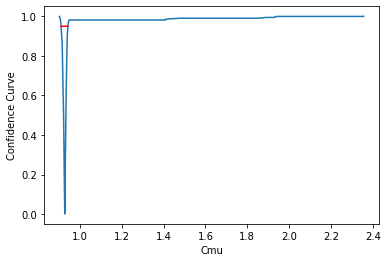

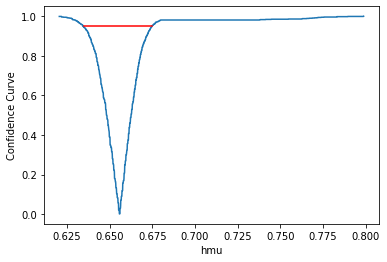

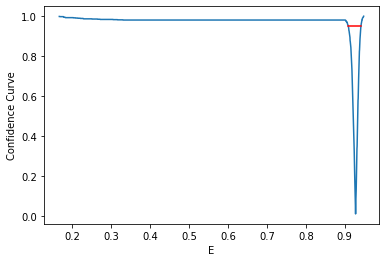

In [3]:
B = 2000 # Number of bootstrap time series to generate.

boot_out = computational_mechanics_bootstrap(stringY, ays, Yt_name_inf = '{}_inf'.format(Yt_name), B = B)

## Compute true measures for original $\epsilon$-machine

In [4]:
HLs, hLs, hmu, ELs, E, Cmu, etas_matrix = compute_ict_measures(transducer_fname_true, ays, inf_alg = 'transCSSR', L_max = 10, to_plot = False)

measures_true = {'Cmu' : Cmu, 'hmu' : hmu, 'E' : E}

## Check coverage of confidence intervals

In [5]:
conf_level = 0.95
alpha = 1 - conf_level

for measure_name in measures_true.keys():
	ci = boot_out['Q'][measure_name]([alpha/2, 1-alpha/2])
	print('{} : {}% CI [{}, {}], true = {}'.format(measure_name, conf_level*100, ci[0], ci[1], measures_true[measure_name]))

Cmu : 95.0% CI [0.9107641596138758, 0.9430550564961061], true = 0.923496204206465
hmu : 95.0% CI [0.6347301710121802, 0.674626129384343], true = 0.6611008359334645
E : 95.0% CI [0.909365229936721, 0.9416209397669782], true = 0.9234962042064256
